# Лабораторная работа №2 по курсу "Методы оптимизации" 


Задание: Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. 
Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно 
заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 
4-х параметров модели.


Базовой моделью незатухающих колебаний является классическое уравнение Вольтерра, описывающее взаимодействие видов типа хищник-жертва. Взаимодействие видов описывается в соответствии с принципами химической кинетики: скорость убыли количества жертв (x) и скорость прибыли количества хищников (y) считается пропорциональными их произведению 

(t - время, alpha(a), beta(b), gamma(g), delta(del) - коэффициенты, отражающие взаимодействия между видами)

dx/dt = ax – bxy

dy/dt = del*xy – g*y

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import fsolve, minimize

In [49]:
x0 = 1
y0 = 1 #начальные условия 
def parameters(coef):
    a = coef[0]
    b = coef[1]
    g = coef[2]
    d = coef[3]
    
#стационарные точки системы, вокруг которых происходят колебания
    x_st = g / d
    y_st = a / b
#фазовое уравнение, С - const, не зависящая от x и y
    c = b * y0 + d * x0 - a * np.log(np.abs(y0)) - g * np.log(np.abs(x0))
    
   
    def x_f(x):
        return (b * y_st + d * x - a * np.log(np.abs(y_st)) - g * np.log(np.abs(x)) - c)
    def y_f(y):
        return (b * y + d * x_st - a * np.log(np.abs(y)) - g * np.log(np.abs(x_st)) - c)
#решение системы нелинейных уравнений для поиска минимума при максимальном приближении к осям x и y
    x_min = fsolve(x_f, 0.01)
    y_min = fsolve(y_f, 0.01)

    return np.abs(y_min / x_min - 1.25)

In [55]:
solution = minimize(parameters, [3, 2, 1, 3])
print("alpha = ", round(solution.x[0],4))
print("beta =  ", round(solution.x[1],4))
print("gamma = ", round(solution.x[2],4))
print("delta = ", round(solution.x[3],4))

alpha =  2.2149
beta =   2.7777
gamma =  1.6039
delta =  2.3138


In [56]:
class Biome(object):
    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        self.pred_init = pred_init
        self.prey_init = prey_init
        self.time = None
        self.prey = None
        self.pred = None
    def run(self, alpha, beta, delta, gamma):
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        for i in range(self._n_iters - 1):
          self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
          self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred
    def plot(self):
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))
        axes.set_xlabel('время')
        axes.set_ylabel('кол-во')
        axes.plot(self.time, self.pred, label='хищники', color='r')
        axes.plot(self.time, self.prey, label='жертвы', color='b')
        axes.legend(loc = 'upper left')
        axes.grid()
        plt.show()
    def plot_cycle(self):
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))
        axes.set_xlabel('количество хищников')
        axes.set_ylabel('кол-во жертв')
        axes.plot(self.pred, self.prey, color='black')
        axes.grid()
        plt.show()

Графическая модель Лотки–Вольтерры позволяет показать основную тенденцию в отношениях "хищник-жертва", которая заключается в том, что колебания численности популяций хищника согласуются с колебаниями численности популяции жертвы. При этом циклы нарастания и спада численности хищников и жертвы по отношению друг к другу смещены. Когда велика численность жертв (пищевой ресурс), увеличивается численность хищников, но не беспредельно, а до тех пор, пока не возникнет напряжение с пищей. Снижение запасов пищи приводит к усилению внутривидовой конкуренции и снижению численности хищника, а это, в свою очередь, вновь приводит к увеличению численности жертвы.

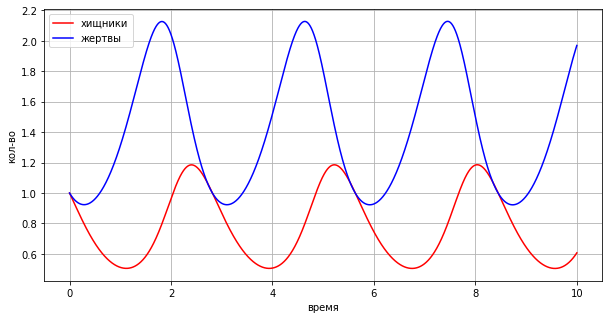

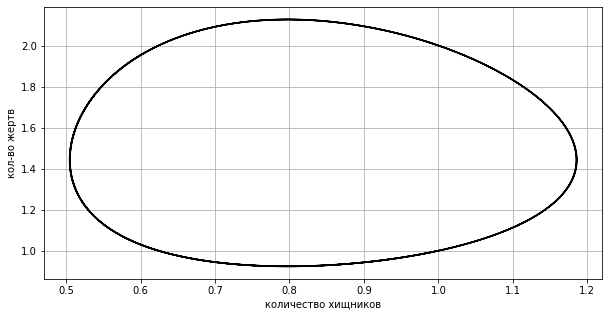

In [57]:
biome = Biome(pred_init=y0, prey_init=x0, tmax=10, dt=0.0001)
biome.run(solution.x[0], solution.x[1], solution.x[2], solution.x[3])
biome.plot()
biome.plot_cycle()